# Parametric Pumping via Three-Wave Mixing

In [1]:
using HarmonicBalance, Plots
using Plots.Measures
using Random

## System

In [2]:
@variables β α ω ω0 F γ t x(t) # declare constant variables and a function x(t)
diff_eq = DifferentialEquation(
    d(x, t, 2) + ω0^2 * x + β * x^2 + α * x^3 + γ * d(x, t) ~ F * cos(ω * t), x
)
add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)

System of 1 differential equations
Variables:       x(t)
Harmonic ansatz: x(t) => ω;   

Differential(t)(Differential(t)(x(t))) + Differential(t)(x(t))*γ + (x(t)^2)*β + x(t)*(ω0^2) + (x(t)^3)*α ~ F*cos(t*ω)


## 1st order Krylov expansion

In [3]:
harmonic_eq = get_krylov_equations(diff_eq; order=1)
harmonic_eq.equations

2-element Vector{Symbolics.Equation}:
 (-(1//2)*u1(T)*γ*ω + (1//2)*v1(T)*(ω^2) - (1//2)*v1(T)*(ω0^2) - (3//8)*(u1(T)^2)*v1(T)*α - (3//8)*(v1(T)^3)*α) / ω ~ Differential(T)(u1(T))
 (-(1//2)*F - (1//2)*u1(T)*(ω^2) + (1//2)*u1(T)*(ω0^2) - (1//2)*v1(T)*γ*ω + (3//8)*(u1(T)^3)*α + (3//8)*u1(T)*(v1(T)^2)*α) / ω ~ Differential(T)(v1(T))

If we both have quadratic and cubic nonlineariy, we observe the normal duffing oscillator response.

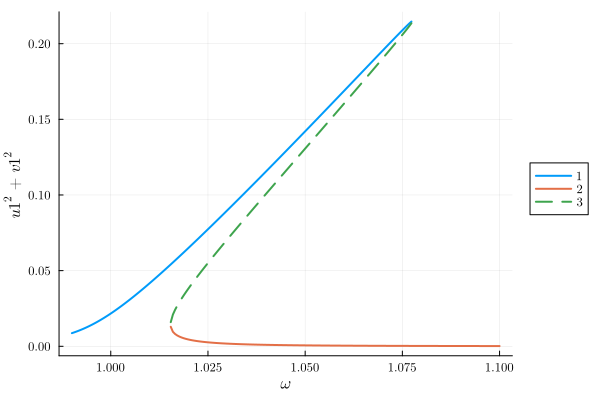

In [4]:
varied = (ω => range(0.99, 1.1, 200)) # range of parameter values
fixed = (α => 1.0, β => 1.0, ω0 => 1.0, γ => 0.005, F => 0.0025) # fixed parameters

result = get_steady_states(harmonic_eq, varied, fixed; threading=true)
plot(result; y="u1^2+v1^2")

If we set the cubic nonlinearity to zero, we recover the driven damped harmonic oscillator. Indeed, thefirst order the quadratic nonlinearity has no affect on the system.

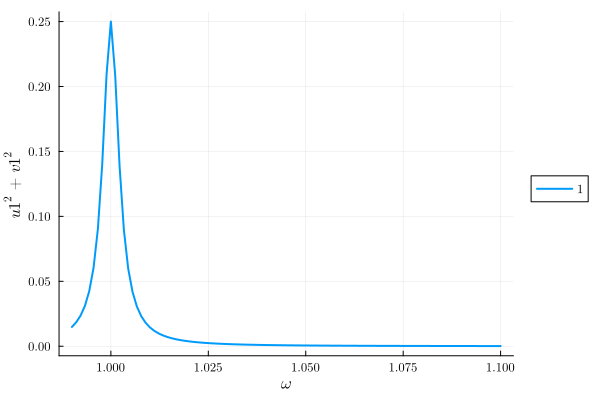

In [5]:
varied = (ω => range(0.99, 1.1, 100))
fixed = (α => 0.0, β => 1.0, ω0 => 1.0, γ => 0.005, F => 0.0025)

result = get_steady_states(harmonic_eq, varied, fixed; threading=true)
plot(result; y="u1^2+v1^2")

## 2nd order Krylov expansion

The quadratic nonlinearity $\beta$ together with the drive at 2ω gives the effective parametric drive $\lambda_\mathrm{eff}=\frac{2F_1\beta}{3m\omega^2}$. But the cubic nonlinearity $\alpha$ is still needed to get the period doubling bifurcation through $\lambda_\mathrm{eff}$.

In [6]:
@variables β α ω ω0 F γ t x(t)
diff_eq = DifferentialEquation(
    d(x, t, 2) + ω0^2 * x + β * x^2 + α * x^3 + γ * d(x, t) ~ F * cos(2ω * t), x
)

add_harmonic!(diff_eq, x, ω)
harmonic_eq2 = get_krylov_equations(diff_eq; order=2)

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: ω, ω0, F, β, α, γ

Harmonic ansatz: 
xˍt(t) = 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

(-(1//6)*F*v1(T)*β + (5//12)*(u1(T)^2)*v1(T)*(β^2) + (5//12)*(v1(T)^3)*(β^2) + (1//8)*v1(T)*(γ^2)*(ω^2) + (1//8)*v1(T)*(ω^4) - (1//4)*v1(T)*(ω^2)*(ω0^2) + (1//8)*v1(T)*(ω0^4) - (3//8)*(u1(T)^2)*v1(T)*α*(ω^2) + (3//8)*(u1(T)^2)*v1(T)*α*(ω0^2) - (3//8)*(v1(T)^3)*α*(ω^2) + (3//8)*(v1(T)^3)*α*(ω0^2) + (51//256)*(u1(T)^4)*v1(T)*(α^2) + (51//128)*(u1(T)^2)*(v1(T)^3)*(α^2) + (51//256)*(v1(T)^5)*(α^2)) / (ω^3) + (-(1//2)*u1(T)*γ*ω + (1//2)*v1(T)*(ω^2) - (1//2)*v1(T)*(ω0^2) - (3//8)*(u1(T)^2)*v1(T)*α - (3//8)*(v1(T)^3)*α) / ω ~ Differential(T)(u1(T))

(-(1//6)*F*u1(T)*β - (5//12)*(u1(T)^3)*(β^2) - (5//12)*u1(T)*(v1(T)^2)*(β^2) - (1//8)*u1(T)*(γ^2)*(ω^2) - (1//8)*u1(T)*(ω^4) + (1//4)*u1(T)*(ω^2)*(ω0^2) - (1//8)*u1(T)*(ω0^4) + (3//8)*(u1(T)^3)*α*(ω^2) - (3//8)*(u1(T)^3)*α*(ω0^2) + (3//8)*u1(T)*(v1(T)^2)*α*(ω^2) - (3//8)*u1(T)*(

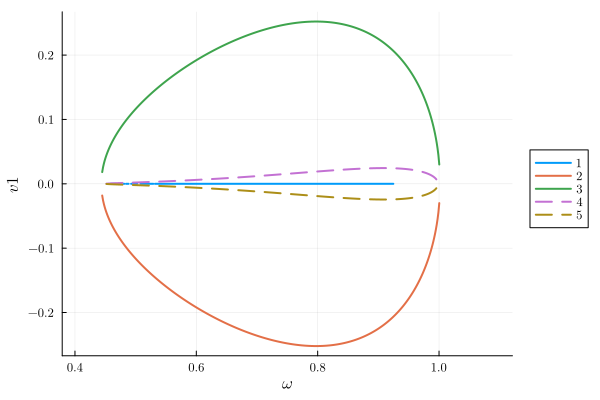

In [7]:
varied = (ω => range(0.4, 1.1, 500))
fixed = (α => 1.0, β => 2.0, ω0 => 1.0, γ => 0.001, F => 0.005)

result = get_steady_states(harmonic_eq2, varied, fixed; threading=true)
plot(result; y="v1")

Solving via total_degree homotopy ... 100%|██████████████████████████████████████████████████| Time: 0:00:58


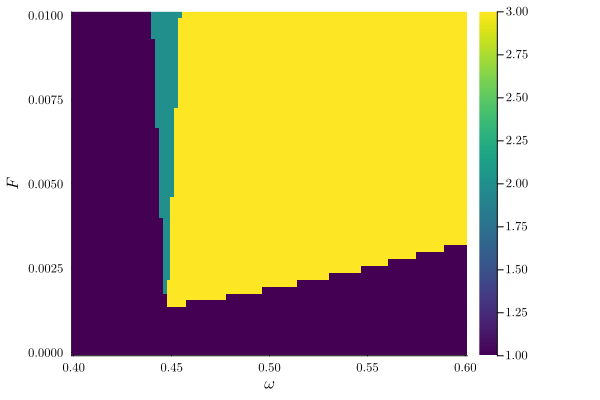

In [8]:
varied = (ω => range(0.4, 0.6, 100), F => range(1e-6, 0.01, 50))
fixed = (α => 1.0, β => 2.0, ω0 => 1.0, γ => 0.01)

result = get_steady_states(
    harmonic_eq2, varied, fixed; threading=true, method=:total_degree
)
plot_phase_diagram(result; class="stable")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*